In [1]:
# Pandas for Everyone Read Along
# Part III. Data Munging
# Created 11/22/20

%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import xlwt
import openpyxl
import numba
from datetime import datetime
import pandas_datareader as pdr

pd.options.mode.chained_assignment = None  # default='warn'

In [7]:
def diag(*args):
    for i in args:
        print(f'{"-"*5} Type: {type(i)}  Len: {len(i)}  {"-"*5}')

        print(f'{i}')

def diag_df(x):
    display(x.info())
    display(x)

In [3]:
now = datetime.now()
print(now)

2020-11-22 09:48:41.313687


In [8]:
t1 = datetime(1970, 1, 1)
t2 = datetime.now()
t3 = t2 - t1
print(t1, '\t'*2, type(t1))
print(t2, '\t'*2, type(t2))
print(t3, '\t'*2, type(t3))

1970-01-01 00:00:00 		 <class 'datetime.datetime'>
2020-11-22 09:52:01.369970 		 <class 'datetime.datetime'>
18588 days, 9:52:01.369970 		 <class 'datetime.timedelta'>


In [11]:
ebola = pd.read_csv('book_resources/data/country_timeseries.csv')
# print(type(ebola))
display(ebola.info())
# display(ebola.describe())
display(ebola)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

None

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
ebola['dt'] = pd.to_datetime(ebola['Date'])
display(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

None

In [31]:
ebola = pd.read_csv('book_resources/data/country_timeseries.csv', parse_dates=[0])
# print(type(ebola))
display(ebola.info())
# display(ebola.describe())
display(ebola)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

None

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
a = ebola['Date']
b = a.dt

In [27]:
diag(a, b)


Type: <class 'pandas.core.series.Series'>
0     2015-01-05
1     2015-01-04
2     2015-01-03
3     2015-01-02
4     2014-12-31
         ...    
117   2014-03-27
118   2014-03-26
119   2014-03-25
120   2014-03-24
121   2014-03-22
Name: Date, Length: 122, dtype: datetime64[ns]

Type: <class 'pandas.core.indexes.accessors.DatetimeProperties'>


In [29]:
c = b.year
c

0      2015
1      2015
2      2015
3      2015
4      2014
       ... 
117    2014
118    2014
119    2014
120    2014
121    2014
Name: Date, Length: 122, dtype: int64

In [32]:
ebola['year'] = ebola['Date'].dt.year
ebola['month'] = ebola['Date'].dt.month
ebola['day'] = ebola['Date'].dt.day
print(ebola.info())
display(ebola)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,year,month,day
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,2015,1,5
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,2015,1,4
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,...,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,2015,1,3
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,2
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,...,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN,2014,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,...,6.0,5.0,NaN,NaN,NaN,NaN,NaN,2014,3,27
118,2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,26
119,2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,25
120,2014-03-24,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,24


In [41]:
min_date = ebola.Date.min()
diag(min_date)

----- Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>  -----
2014-03-22 00:00:00


In [42]:
ebola['outbreak day'] = ebola.Date - min_date
print(ebola.info())
display(ebola)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Date                 122 non-null    datetime64[ns] 
 1   Day                  122 non-null    int64          
 2   Cases_Guinea         93 non-null     float64        
 3   Cases_Liberia        83 non-null     float64        
 4   Cases_SierraLeone    87 non-null     float64        
 5   Cases_Nigeria        38 non-null     float64        
 6   Cases_Senegal        25 non-null     float64        
 7   Cases_UnitedStates   18 non-null     float64        
 8   Cases_Spain          16 non-null     float64        
 9   Cases_Mali           12 non-null     float64        
 10  Deaths_Guinea        92 non-null     float64        
 11  Deaths_Liberia       81 non-null     float64        
 12  Deaths_SierraLeone   87 non-null     float64        
 13  Deaths_Nigeria      

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,year,month,day,outbreak day
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,...,2977.0,NaN,NaN,NaN,NaN,NaN,2015,1,5,289 days
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,...,2943.0,NaN,NaN,NaN,NaN,NaN,2015,1,4,288 days
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,...,2915.0,NaN,NaN,NaN,NaN,NaN,2015,1,3,287 days
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,2,286 days
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,...,2827.0,NaN,NaN,NaN,NaN,NaN,2014,12,31,284 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,2014,3,27,5 days
118,2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,26,4 days
119,2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,25,3 days
120,2014-03-24,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,24,2 days


In [45]:
banks = pd.read_csv('book_resources/data/banklist.csv', parse_dates=[5, 6])
diag_df(banks)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              553 non-null    object        
 1   City                   553 non-null    object        
 2   ST                     553 non-null    object        
 3   CERT                   553 non-null    int64         
 4   Acquiring Institution  553 non-null    object        
 5   Closing Date           553 non-null    datetime64[ns]
 6   Updated Date           553 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 21.7+ KB


None

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-07-26
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,2017-03-03,2017-05-18
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,2017-01-27,2017-05-18
...,...,...,...,...,...,...,...
548,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",2001-07-27,2014-08-19
549,Malta National Bank,Malta,OH,6629,North Valley Bank,2001-05-03,2002-11-18
550,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2001-02-02,2003-02-18
551,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,2000-12-14,2005-03-17


In [47]:
banks['closing year'], banks['closing quarter'] =  banks['Closing Date'].dt.year, banks['Closing Date'].dt.quarter
diag_df(banks)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              553 non-null    object        
 1   City                   553 non-null    object        
 2   ST                     553 non-null    object        
 3   CERT                   553 non-null    int64         
 4   Acquiring Institution  553 non-null    object        
 5   Closing Date           553 non-null    datetime64[ns]
 6   Updated Date           553 non-null    datetime64[ns]
 7   closing year           553 non-null    int64         
 8   closing quarter        553 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 30.3+ KB


None

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing year,closing quarter
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2017,2
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2017,2
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-07-26,2017,2
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,2017-03-03,2017-05-18,2017,1
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,2017-01-27,2017-05-18,2017,1
...,...,...,...,...,...,...,...,...,...
548,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",2001-07-27,2014-08-19,2001,3
549,Malta National Bank,Malta,OH,6629,North Valley Bank,2001-05-03,2002-11-18,2001,2
550,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2001-02-02,2003-02-18,2001,1
551,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,2000-12-14,2005-03-17,2000,4


In [59]:
closing_year = banks.groupby(['closing year']).size()
diag(closing_year)

----- Type: <class 'pandas.core.series.Series'>  -----
closing year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      6
dtype: int64


In [60]:
closing_year_q = banks.groupby(['closing year', 'closing quarter']).size()
diag(closing_year_q)

----- Type: <class 'pandas.core.series.Series'>  -----
closing year  closing quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2

<IPython.core.display.Javascript object>


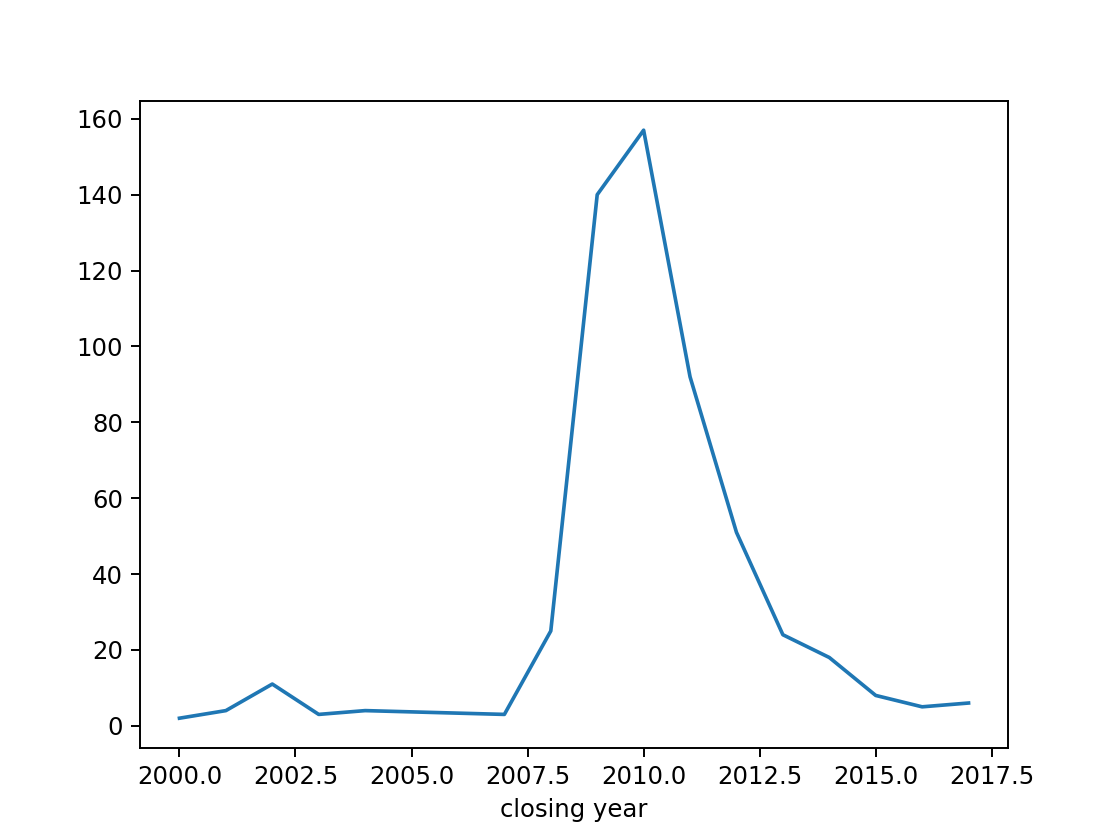

<IPython.core.display.Javascript object>


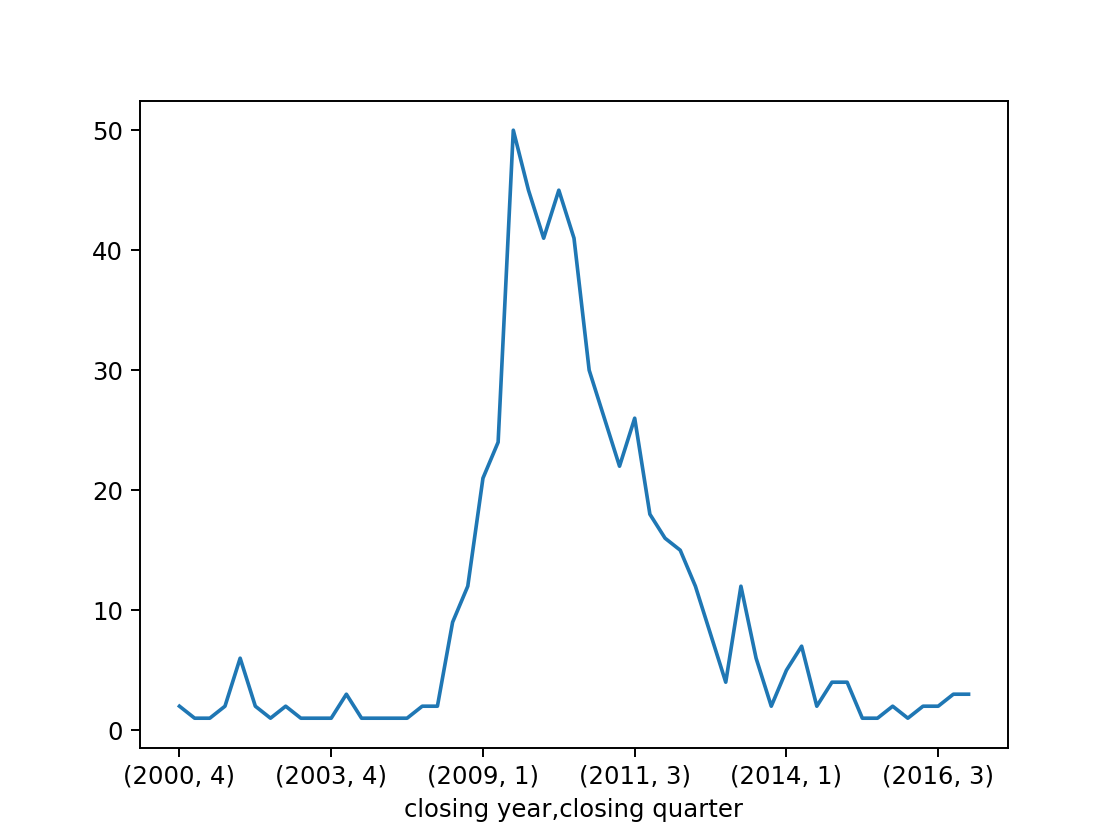

c:\users\tony\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='closing year,closing quarter'>

In [65]:
fig1, ax1 = plt.subplots()
closing_year.plot(ax=ax1)

fig2, ax2 = plt.subplots()
closing_year_q.plot(ax=ax2)


In [66]:
pwd

'D:\\Google Drive\\My Documents\\code\\python\\Pycharm Projects\\Self Study\\Pandas for Everyone'

In [91]:
tesla = pdr.get_data_yahoo('TSLA')

In [92]:
diag_df(tesla)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-11-25 to 2020-11-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1258 non-null   float64
 1   Low        1258 non-null   float64
 2   Open       1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   float64
 5   Adj Close  1258 non-null   float64
dtypes: float64(6)
memory usage: 68.8 KB


None

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-25,46.166000,44.076000,44.268002,45.928001,19954000.0,45.928001
2015-11-27,46.450001,45.402000,46.212002,46.321999,9747000.0,46.321999
2015-11-30,46.855999,45.816002,46.358002,46.051998,13299000.0,46.051998
2015-12-01,47.599998,46.209999,46.212002,47.438000,18670000.0,47.438000
2015-12-02,47.720001,46.245998,47.400002,46.397999,14907500.0,46.397999
...,...,...,...,...,...,...
2020-11-17,462.000000,433.010010,460.170013,441.609985,61188300.0,441.609985
2020-11-18,496.000000,443.500000,448.350006,486.640015,78044000.0,486.640015
2020-11-19,508.609985,487.570007,492.000000,499.269989,62475300.0,499.269989


In [93]:
diag(tesla.index)

----- Type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>  -----
DatetimeIndex(['2015-11-25', '2015-11-27', '2015-11-30', '2015-12-01',
               '2015-12-02', '2015-12-03', '2015-12-04', '2015-12-07',
               '2015-12-08', '2015-12-09',
               ...
               '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
               '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19',
               '2020-11-20', '2020-11-23'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)


In [96]:
tesla.to_csv('tesla.csv')

In [97]:
tesla2 = pd.read_csv('tesla.csv', parse_dates=[0], index_col=0)
diag_df(tesla2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-11-25 to 2020-11-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1258 non-null   float64
 1   Low        1258 non-null   float64
 2   Open       1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   float64
 5   Adj Close  1258 non-null   float64
dtypes: float64(6)
memory usage: 68.8 KB


None

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-25,46.166000,44.076000,44.268002,45.928001,19954000.0,45.928001
2015-11-27,46.450001,45.402000,46.212002,46.321999,9747000.0,46.321999
2015-11-30,46.855999,45.816002,46.358002,46.051998,13299000.0,46.051998
2015-12-01,47.599998,46.209999,46.212002,47.438000,18670000.0,47.438000
2015-12-02,47.720001,46.245998,47.400002,46.397999,14907500.0,46.397999
...,...,...,...,...,...,...
2020-11-17,462.000000,433.010010,460.170013,441.609985,61188300.0,441.609985
2020-11-18,496.000000,443.500000,448.350006,486.640015,78044000.0,486.640015
2020-11-19,508.609985,487.570007,492.000000,499.269989,62475300.0,499.269989


In [98]:
np.max(tesla - tesla2)

High         5.684342e-14
Low          5.684342e-14
Open         2.842171e-14
Close        5.684342e-14
Volume       0.000000e+00
Adj Close    5.684342e-14
dtype: float64

In [99]:
tesla3 = pd.read_csv('tesla.csv', parse_dates=[0])
diag_df(tesla3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   High       1258 non-null   float64       
 2   Low        1258 non-null   float64       
 3   Open       1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   float64       
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.9 KB


None

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-25,46.166000,44.076000,44.268002,45.928001,19954000.0,45.928001
1,2015-11-27,46.450001,45.402000,46.212002,46.321999,9747000.0,46.321999
2,2015-11-30,46.855999,45.816002,46.358002,46.051998,13299000.0,46.051998
3,2015-12-01,47.599998,46.209999,46.212002,47.438000,18670000.0,47.438000
4,2015-12-02,47.720001,46.245998,47.400002,46.397999,14907500.0,46.397999
...,...,...,...,...,...,...,...
1253,2020-11-17,462.000000,433.010010,460.170013,441.609985,61188300.0,441.609985
1254,2020-11-18,496.000000,443.500000,448.350006,486.640015,78044000.0,486.640015
1255,2020-11-19,508.609985,487.570007,492.000000,499.269989,62475300.0,499.269989
1256,2020-11-20,502.500000,489.059998,497.989990,489.609985,32807300.0,489.609985


In [105]:
a = (tesla3.Date.dt.year == 2016) & (tesla3.Date.dt.month == 6)
diag(a)

----- Type: <class 'pandas.core.series.Series'>  -----
0       False
1       False
2       False
3       False
4       False
        ...  
1253    False
1254    False
1255    False
1256    False
1257    False
Name: Date, Length: 1258, dtype: bool


In [106]:
b = tesla3[a]
diag_df(b)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 128 to 149
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       22 non-null     datetime64[ns]
 1   High       22 non-null     float64       
 2   Low        22 non-null     float64       
 3   Open       22 non-null     float64       
 4   Close      22 non-null     float64       
 5   Volume     22 non-null     float64       
 6   Adj Close  22 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.4 KB


None

,Date,High,Low,Open,Close,Volume,Adj Close
128,2016-06-01,44.480000,43.377998,44.296001,43.911999,14913500.0,43.911999
129,2016-06-02,43.981998,43.422001,43.917999,43.792000,10164000.0,43.792000
130,2016-06-03,44.388000,43.602001,44.000000,43.798000,11145000.0,43.798000
131,2016-06-06,44.180000,43.090000,43.599998,44.136002,11247500.0,44.136002
132,2016-06-07,46.888000,44.304001,44.448002,46.467999,31068000.0,46.467999
133,2016-06-08,48.169998,46.521999,46.759998,47.104000,29860000.0,47.104000
134,2016-06-09,47.066002,45.411999,46.995998,45.872002,22460500.0,45.872002
135,2016-06-10,45.594002,43.683998,45.478001,43.757999,30133000.0,43.757999
136,2016-06-13,45.153999,43.532001,43.900002,43.574001,20965000.0,43.574001
137,2016-06-14,44.439999,42.506001,43.776001,42.992001,17901000.0,42.992001


In [107]:
max(a)

True

In [108]:
min(a)

False

In [109]:
diag_df(tesla3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   High       1258 non-null   float64       
 2   Low        1258 non-null   float64       
 3   Open       1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   float64       
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.9 KB


None

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-25,46.166000,44.076000,44.268002,45.928001,19954000.0,45.928001
1,2015-11-27,46.450001,45.402000,46.212002,46.321999,9747000.0,46.321999
2,2015-11-30,46.855999,45.816002,46.358002,46.051998,13299000.0,46.051998
3,2015-12-01,47.599998,46.209999,46.212002,47.438000,18670000.0,47.438000
4,2015-12-02,47.720001,46.245998,47.400002,46.397999,14907500.0,46.397999
...,...,...,...,...,...,...,...
1253,2020-11-17,462.000000,433.010010,460.170013,441.609985,61188300.0,441.609985
1254,2020-11-18,496.000000,443.500000,448.350006,486.640015,78044000.0,486.640015
1255,2020-11-19,508.609985,487.570007,492.000000,499.269989,62475300.0,499.269989
1256,2020-11-20,502.500000,489.059998,497.989990,489.609985,32807300.0,489.609985


In [110]:
tesla3.index = tesla3['Date']
diag_df(tesla3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-11-25 to 2020-11-23
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   High       1258 non-null   float64       
 2   Low        1258 non-null   float64       
 3   Open       1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   float64       
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 78.6 KB


None

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2015-11-25,2015-11-25,46.166000,44.076000,44.268002,45.928001,19954000.0,45.928001
2015-11-27,2015-11-27,46.450001,45.402000,46.212002,46.321999,9747000.0,46.321999
2015-11-30,2015-11-30,46.855999,45.816002,46.358002,46.051998,13299000.0,46.051998
2015-12-01,2015-12-01,47.599998,46.209999,46.212002,47.438000,18670000.0,47.438000
2015-12-02,2015-12-02,47.720001,46.245998,47.400002,46.397999,14907500.0,46.397999
...,...,...,...,...,...,...,...
2020-11-17,2020-11-17,462.000000,433.010010,460.170013,441.609985,61188300.0,441.609985
2020-11-18,2020-11-18,496.000000,443.500000,448.350006,486.640015,78044000.0,486.640015
2020-11-19,2020-11-19,508.609985,487.570007,492.000000,499.269989,62475300.0,499.269989


In [119]:
tesla3['2016-01'].iloc[:,:]

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2016-01-04,2016-01-04,46.276001,43.799999,46.144001,44.681999,34135500.0,44.681999
2016-01-05,2016-01-05,45.377998,44.000000,45.271999,44.686001,15934000.0,44.686001
2016-01-06,2016-01-06,44.009998,43.195999,44.000000,43.807999,18895500.0,43.807999
2016-01-07,2016-01-07,43.688000,42.734001,42.838001,43.130001,17771500.0,43.130001
2016-01-08,2016-01-08,44.088001,42.153999,43.571999,42.200001,18140500.0,42.200001
2016-01-11,2016-01-11,42.889999,40.599998,42.801998,41.570000,20457000.0,41.570000
2016-01-12,2016-01-12,42.748001,41.062000,42.320000,41.993999,15459500.0,41.993999
2016-01-13,2016-01-13,42.529999,40.000000,42.402000,40.062000,20632000.0,40.062000
2016-01-14,2016-01-14,42.000000,38.675999,40.442001,41.236000,32453500.0,41.236000


In [120]:
tesla3.loc['2016-01-04']

Date         2016-01-04 00:00:00
High                      46.276
Low                         43.8
Open                      46.144
Close                     44.682
Volume               3.41355e+07
Adj Close                 44.682
Name: 2016-01-04 00:00:00, dtype: object

In [121]:
tesla4 = tesla3.copy()
diag_df(tesla4)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-11-25 to 2020-11-23
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   High       1258 non-null   float64       
 2   Low        1258 non-null   float64       
 3   Open       1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   float64       
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 110.6 KB


None

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2015-11-25,2015-11-25,46.166000,44.076000,44.268002,45.928001,19954000.0,45.928001
2015-11-27,2015-11-27,46.450001,45.402000,46.212002,46.321999,9747000.0,46.321999
2015-11-30,2015-11-30,46.855999,45.816002,46.358002,46.051998,13299000.0,46.051998
2015-12-01,2015-12-01,47.599998,46.209999,46.212002,47.438000,18670000.0,47.438000
2015-12-02,2015-12-02,47.720001,46.245998,47.400002,46.397999,14907500.0,46.397999
...,...,...,...,...,...,...,...
2020-11-17,2020-11-17,462.000000,433.010010,460.170013,441.609985,61188300.0,441.609985
2020-11-18,2020-11-18,496.000000,443.500000,448.350006,486.640015,78044000.0,486.640015
2020-11-19,2020-11-19,508.609985,487.570007,492.000000,499.269989,62475300.0,499.269989


In [123]:
tesla4['dt_diff'] = tesla4['Date'] - tesla4['Date'].min()
tesla4.index = tesla4['dt_diff']
diag_df(tesla4)

<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 1258 entries, 0 days to 1825 days
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   Date       1258 non-null   datetime64[ns] 
 1   High       1258 non-null   float64        
 2   Low        1258 non-null   float64        
 3   Open       1258 non-null   float64        
 4   Close      1258 non-null   float64        
 5   Volume     1258 non-null   float64        
 6   Adj Close  1258 non-null   float64        
 7   dt_diff    1258 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(6), timedelta64[ns](1)
memory usage: 88.5 KB


None

,Date,High,Low,Open,Close,Volume,Adj Close,dt_diff
dt_diff,,,,,,,,
0 days,2015-11-25,46.166000,44.076000,44.268002,45.928001,19954000.0,45.928001,0 days
2 days,2015-11-27,46.450001,45.402000,46.212002,46.321999,9747000.0,46.321999,2 days
5 days,2015-11-30,46.855999,45.816002,46.358002,46.051998,13299000.0,46.051998,5 days
6 days,2015-12-01,47.599998,46.209999,46.212002,47.438000,18670000.0,47.438000,6 days
7 days,2015-12-02,47.720001,46.245998,47.400002,46.397999,14907500.0,46.397999,7 days
...,...,...,...,...,...,...,...,...
1819 days,2020-11-17,462.000000,433.010010,460.170013,441.609985,61188300.0,441.609985,1819 days
1820 days,2020-11-18,496.000000,443.500000,448.350006,486.640015,78044000.0,486.640015,1820 days
1821 days,2020-11-19,508.609985,487.570007,492.000000,499.269989,62475300.0,499.269989,1821 days


In [126]:
print(tesla4['-5 days':'19 days'])

              Date       High        Low       Open      Close      Volume  \
dt_diff                                                                      
0 days  2015-11-25  46.166000  44.076000  44.268002  45.928001  19954000.0   
2 days  2015-11-27  46.450001  45.402000  46.212002  46.321999   9747000.0   
5 days  2015-11-30  46.855999  45.816002  46.358002  46.051998  13299000.0   
6 days  2015-12-01  47.599998  46.209999  46.212002  47.438000  18670000.0   
7 days  2015-12-02  47.720001  46.245998  47.400002  46.397999  14907500.0   
8 days  2015-12-03  47.490002  46.000000  47.096001  46.542000  14698000.0   
9 days  2015-12-04  46.653999  45.532001  46.492001  46.076000  12868000.0   
12 days 2015-12-07  47.125999  45.230000  45.540001  46.226002  15721000.0   
13 days 2015-12-08  45.759998  44.840000  45.504002  45.344002  13438000.0   
14 days 2015-12-09  45.500000  44.144001  45.340000  44.903999  15289000.0   
15 days 2015-12-10  45.698002  44.728001  44.942001  45.414001  

In [127]:
ebola = pd.read_csv('book_resources/data/country_timeseries.csv')
diag_df(ebola)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

None

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
ebola_5 = ebola.head(5)
diag_df(ebola_5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 5 non-null      object 
 1   Day                  5 non-null      int64  
 2   Cases_Guinea         4 non-null      float64
 3   Cases_Liberia        3 non-null      float64
 4   Cases_SierraLeone    4 non-null      float64
 5   Cases_Nigeria        0 non-null      float64
 6   Cases_Senegal        0 non-null      float64
 7   Cases_UnitedStates   0 non-null      float64
 8   Cases_Spain          0 non-null      float64
 9   Cases_Mali           0 non-null      float64
 10  Deaths_Guinea        4 non-null      float64
 11  Deaths_Liberia       3 non-null      float64
 12  Deaths_SierraLeone   4 non-null      float64
 13  Deaths_Nigeria       0 non-null      float64
 14  Deaths_Senegal       0 non-null      float64
 15  Deaths_UnitedStates  0 non-null      float64

None

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [148]:
ebola_5.Date = pd.to_datetime(ebola_5.Date)
diag_df(ebola_5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 5 non-null      datetime64[ns]
 1   Day                  5 non-null      int64         
 2   Cases_Guinea         4 non-null      float64       
 3   Cases_Liberia        3 non-null      float64       
 4   Cases_SierraLeone    4 non-null      float64       
 5   Cases_Nigeria        0 non-null      float64       
 6   Cases_Senegal        0 non-null      float64       
 7   Cases_UnitedStates   0 non-null      float64       
 8   Cases_Spain          0 non-null      float64       
 9   Cases_Mali           0 non-null      float64       
 10  Deaths_Guinea        4 non-null      float64       
 11  Deaths_Liberia       3 non-null      float64       
 12  Deaths_SierraLeone   4 non-null      float64       
 13  Deaths_Nigeria       0 non-null      fl

None

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [149]:
ebola_5.index = ebola_5['Date']
diag_df(ebola_5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2015-01-05 to 2014-12-31
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 5 non-null      datetime64[ns]
 1   Day                  5 non-null      int64         
 2   Cases_Guinea         4 non-null      float64       
 3   Cases_Liberia        3 non-null      float64       
 4   Cases_SierraLeone    4 non-null      float64       
 5   Cases_Nigeria        0 non-null      float64       
 6   Cases_Senegal        0 non-null      float64       
 7   Cases_UnitedStates   0 non-null      float64       
 8   Cases_Spain          0 non-null      float64       
 9   Cases_Mali           0 non-null      float64       
 10  Deaths_Guinea        4 non-null      float64       
 11  Deaths_Liberia       3 non-null      float64       
 12  Deaths_SierraLeone   4 non-null      float64       
 13  Deaths_Nigeria    

None

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2015-01-05,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [152]:
date_head = pd.date_range(start='2014-12-30', end='2015-01-06')
diag(date_head)

----- Type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>  -----
DatetimeIndex(['2014-12-30', '2014-12-31', '2015-01-01', '2015-01-02',
               '2015-01-03', '2015-01-04', '2015-01-05', '2015-01-06'],
              dtype='datetime64[ns]', freq='D')


In [153]:
ebola_6 = ebola_5.reindex(date_head)
diag_df(ebola_6)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2014-12-30 to 2015-01-06
Freq: D
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 5 non-null      datetime64[ns]
 1   Day                  5 non-null      float64       
 2   Cases_Guinea         4 non-null      float64       
 3   Cases_Liberia        3 non-null      float64       
 4   Cases_SierraLeone    4 non-null      float64       
 5   Cases_Nigeria        0 non-null      float64       
 6   Cases_Senegal        0 non-null      float64       
 7   Cases_UnitedStates   0 non-null      float64       
 8   Cases_Spain          0 non-null      float64       
 9   Cases_Mali           0 non-null      float64       
 10  Deaths_Guinea        4 non-null      float64       
 11  Deaths_Liberia       3 non-null      float64       
 12  Deaths_SierraLeone   4 non-null      float64       
 13  Deaths_Nig

None

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
2014-12-30,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,2014-12-31,284.0,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-05,2015-01-05,289.0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ebola = pd.read_csv('book_resources/data/country_timeseries.csv', parse_dates=[0])
diag_df(ebola)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

None

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
diag(head_range)

----- Type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>  Len: 6  -----
DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [9]:
ebola_5 = ebola.head(5)
diag_df(ebola_5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 5 non-null      datetime64[ns]
 1   Day                  5 non-null      int64         
 2   Cases_Guinea         4 non-null      float64       
 3   Cases_Liberia        3 non-null      float64       
 4   Cases_SierraLeone    4 non-null      float64       
 5   Cases_Nigeria        0 non-null      float64       
 6   Cases_Senegal        0 non-null      float64       
 7   Cases_UnitedStates   0 non-null      float64       
 8   Cases_Spain          0 non-null      float64       
 9   Cases_Mali           0 non-null      float64       
 10  Deaths_Guinea        4 non-null      float64       
 11  Deaths_Liberia       3 non-null      float64       
 12  Deaths_SierraLeone   4 non-null      float64       
 13  Deaths_Nigeria       0 non-null      fl

None

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [10]:
ebola_5.index = ebola_5['Date']
diag_df(ebola_5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2015-01-05 to 2014-12-31
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 5 non-null      datetime64[ns]
 1   Day                  5 non-null      int64         
 2   Cases_Guinea         4 non-null      float64       
 3   Cases_Liberia        3 non-null      float64       
 4   Cases_SierraLeone    4 non-null      float64       
 5   Cases_Nigeria        0 non-null      float64       
 6   Cases_Senegal        0 non-null      float64       
 7   Cases_UnitedStates   0 non-null      float64       
 8   Cases_Spain          0 non-null      float64       
 9   Cases_Mali           0 non-null      float64       
 10  Deaths_Guinea        4 non-null      float64       
 11  Deaths_Liberia       3 non-null      float64       
 12  Deaths_SierraLeone   4 non-null      float64       
 13  Deaths_Nigeria    

None

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2015-01-05,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [11]:
ebola_6 = ebola_5.reindex(head_range)
diag_df(ebola_6)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2014-12-31 to 2015-01-05
Freq: D
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 5 non-null      datetime64[ns]
 1   Day                  5 non-null      float64       
 2   Cases_Guinea         4 non-null      float64       
 3   Cases_Liberia        3 non-null      float64       
 4   Cases_SierraLeone    4 non-null      float64       
 5   Cases_Nigeria        0 non-null      float64       
 6   Cases_Senegal        0 non-null      float64       
 7   Cases_UnitedStates   0 non-null      float64       
 8   Cases_Spain          0 non-null      float64       
 9   Cases_Mali           0 non-null      float64       
 10  Deaths_Guinea        4 non-null      float64       
 11  Deaths_Liberia       3 non-null      float64       
 12  Deaths_SierraLeone   4 non-null      float64       
 13  Deaths_Nig

None

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
2014-12-31,2014-12-31,284.0,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-05,2015-01-05,289.0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN


In [21]:
df = pd.DataFrame()
dates_2020 = pd.date_range(start='01-01-2020', end='12-31-2020')
df['Date'] = dates_2020
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day
diag_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    366 non-null    datetime64[ns]
 1   Month   366 non-null    int64         
 2   Week    366 non-null    UInt32        
 3   Day     366 non-null    int64         
dtypes: UInt32(1), datetime64[ns](1), int64(2)
memory usage: 10.4 KB


None

,Date,Month,Week,Day
0,2020-01-01,1,1,1
1,2020-01-02,1,1,2
2,2020-01-03,1,1,3
3,2020-01-04,1,1,4
4,2020-01-05,1,1,5
...,...,...,...,...
361,2020-12-27,12,52,27
362,2020-12-28,12,53,28
363,2020-12-29,12,53,29
364,2020-12-30,12,53,30


In [22]:
df.head(15)

,Date,Month,Week,Day
0,2020-01-01,1,1,1
1,2020-01-02,1,1,2
2,2020-01-03,1,1,3
3,2020-01-04,1,1,4
4,2020-01-05,1,1,5
5,2020-01-06,1,2,6
6,2020-01-07,1,2,7
7,2020-01-08,1,2,8
8,2020-01-09,1,2,9
9,2020-01-10,1,2,10


In [23]:
df.index = df['Date']
diag_df(df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2020-01-01 to 2020-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    366 non-null    datetime64[ns]
 1   Month   366 non-null    int64         
 2   Week    366 non-null    UInt32        
 3   Day     366 non-null    int64         
dtypes: UInt32(1), datetime64[ns](1), int64(2)
memory usage: 13.2 KB


None

,Date,Month,Week,Day
Date,,,,
2020-01-01,2020-01-01,1,1,1
2020-01-02,2020-01-02,1,1,2
2020-01-03,2020-01-03,1,1,3
2020-01-04,2020-01-04,1,1,4
2020-01-05,2020-01-05,1,1,5
...,...,...,...,...
2020-12-27,2020-12-27,12,52,27
2020-12-28,2020-12-28,12,53,28
2020-12-29,2020-12-29,12,53,29


In [25]:
all(df.index == df['Date'])

True

In [26]:
df.index is df['Date']

False

In [40]:
months = pd.date_range(start='10-01-2019', end='12-31-2020', freq='M')
diag(months)

weeks = pd.date_range(start='12-01-2019', end='12-31-2020', freq='W-SUN')
diag(weeks)

----- Type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>  Len: 15  -----
DatetimeIndex(['2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')
----- Type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>  Len: 57  -----
DatetimeIndex(['2019-12-01', '2019-12-08', '2019-12-15', '2019-12-22',
               '2019-12-29', '2020-01-05', '2020-01-12', '2020-01-19',
               '2020-01-26', '2020-02-02', '2020-02-09', '2020-02-16',
               '2020-02-23', '2020-03-01', '2020-03-08', '2020-03-15',
               '2020-03-22', '2020-03-29', '2020-04-05', '2020-04-12',
               '2020-04-19', '2020-04-26', '2020-05-03', '2020-05-10',
               '2020-05-17', '2020-05-24', '2020-05-31', '2020-06-07',
               '2020

In [41]:
df_m = df.reindex(months)
diag_df(df_m)

df_w = df.reindex(weeks)
diag_df(df_w)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2019-10-31 to 2020-12-31
Freq: M
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12 non-null     datetime64[ns]
 1   Month   12 non-null     float64       
 2   Week    12 non-null     UInt32        
 3   Day     12 non-null     float64       
dtypes: UInt32(1), datetime64[ns](1), float64(2)
memory usage: 555.0 bytes


None

,Date,Month,Week,Day
2019-10-31,NaT,NaN,<NA>,NaN
2019-11-30,NaT,NaN,<NA>,NaN
2019-12-31,NaT,NaN,<NA>,NaN
2020-01-31,2020-01-31,1.0,5,31.0
2020-02-29,2020-02-29,2.0,9,29.0
2020-03-31,2020-03-31,3.0,14,31.0
2020-04-30,2020-04-30,4.0,18,30.0
2020-05-31,2020-05-31,5.0,22,31.0
2020-06-30,2020-06-30,6.0,27,30.0
2020-07-31,2020-07-31,7.0,31,31.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57 entries, 2019-12-01 to 2020-12-27
Freq: W-SUN
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    52 non-null     datetime64[ns]
 1   Month   52 non-null     float64       
 2   Week    52 non-null     UInt32        
 3   Day     52 non-null     float64       
dtypes: UInt32(1), datetime64[ns](1), float64(2)
memory usage: 2.1 KB


None

,Date,Month,Week,Day
2019-12-01,NaT,NaN,<NA>,NaN
2019-12-08,NaT,NaN,<NA>,NaN
2019-12-15,NaT,NaN,<NA>,NaN
2019-12-22,NaT,NaN,<NA>,NaN
2019-12-29,NaT,NaN,<NA>,NaN
2020-01-05,2020-01-05,1.0,1,5.0
2020-01-12,2020-01-12,1.0,2,12.0
2020-01-19,2020-01-19,1.0,3,19.0
2020-01-26,2020-01-26,1.0,4,26.0
2020-02-02,2020-02-02,2.0,5,2.0


In [43]:
diag_df(ebola)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

None

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
ebola.index = ebola.Date
diag_df(ebola)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2015-01-05 to 2014-03-22
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria  

None

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2015-01-05,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-27,2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
2014-03-26,2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-25,2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
ebola_range = pd.date_range(start=ebola.index.min(), end=ebola.index.max())
diag(ebola_range)

----- Type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>  Len: 290  -----
DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [46]:
ebola2 = ebola.reindex(ebola_range)
diag_df(ebola2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 2014-03-22 to 2015-01-05
Freq: D
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    float64       
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_N

None

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
2014-03-22,2014-03-22,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-23,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,2014-03-24,2.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-25,2014-03-25,3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-26,2014-03-26,4.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


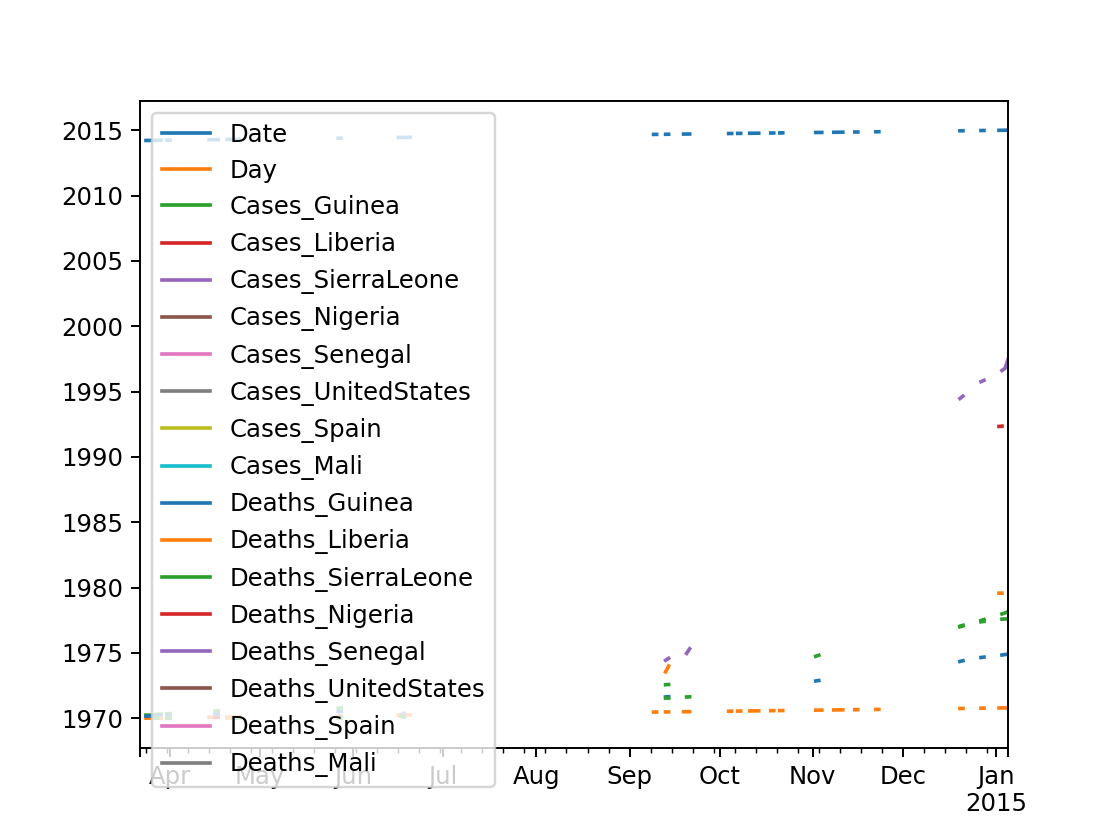

<AxesSubplot:>

In [47]:
fig1, ax1 = plt.subplots()
ebola2.plot(ax=ax1)

<IPython.core.display.Javascript object>


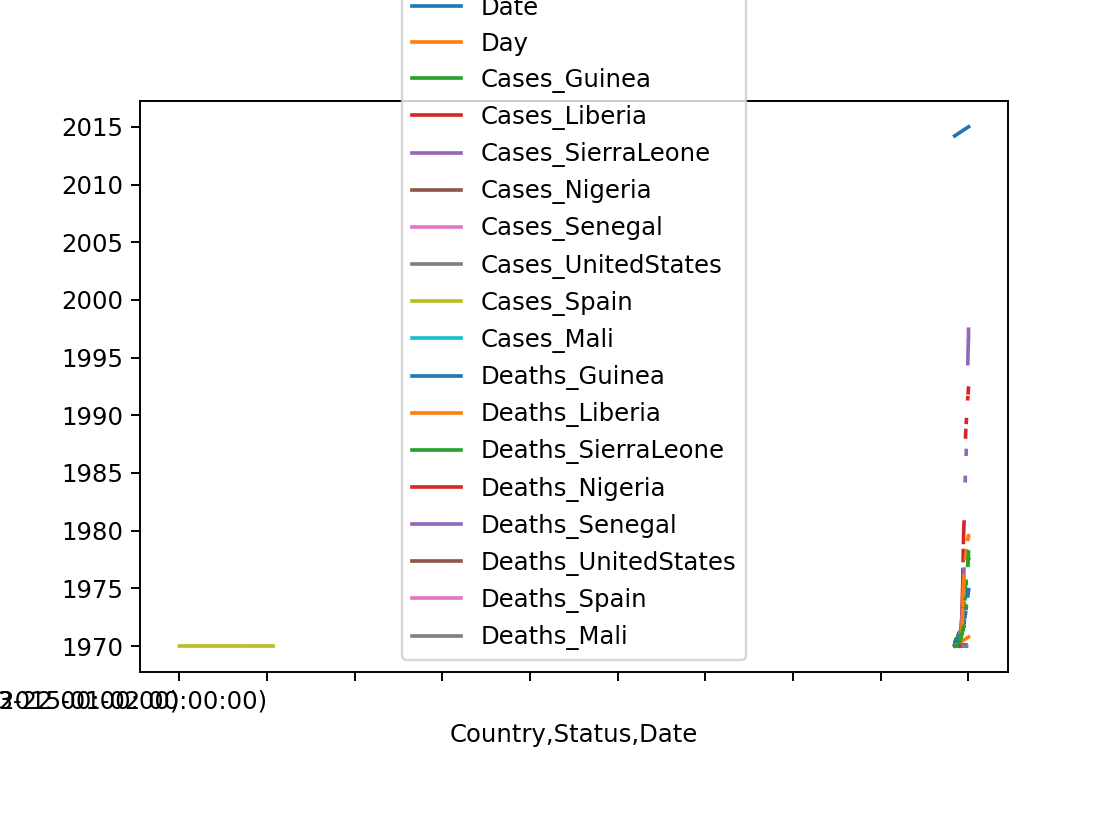

<AxesSubplot:xlabel='Date'>

In [48]:
fig2, ax2 = plt.subplots()
ebola.plot(ax=ax2)

In [50]:
ebola_long = ebola.melt(id_vars=['Date', 'Day'])
diag_df(ebola_long)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1952 non-null   datetime64[ns]
 1   Day       1952 non-null   int64         
 2   variable  1952 non-null   object        
 3   value     738 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 53.4+ KB


None

,Date,Day,variable,value
0,2015-01-05,289,Cases_Guinea,2776.0
1,2015-01-04,288,Cases_Guinea,2775.0
2,2015-01-03,287,Cases_Guinea,2769.0
3,2015-01-02,286,Cases_Guinea,NaN
4,2014-12-31,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,2014-03-27,5,Deaths_Mali,NaN
1948,2014-03-26,4,Deaths_Mali,NaN
1949,2014-03-25,3,Deaths_Mali,NaN
1950,2014-03-24,2,Deaths_Mali,NaN


In [51]:
variable_split = ebola_long.variable.str.split('_', expand=True)
variable_split.columns = ['status', 'country']
ebola_long = pd.concat([ebola_long, variable_split], axis=1)
diag_df(ebola_long)
        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1952 non-null   datetime64[ns]
 1   Day       1952 non-null   int64         
 2   variable  1952 non-null   object        
 3   value     738 non-null    float64       
 4   status    1952 non-null   object        
 5   country   1952 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 68.7+ KB


None

,Date,Day,variable,value,status,country
0,2015-01-05,289,Cases_Guinea,2776.0,Cases,Guinea
1,2015-01-04,288,Cases_Guinea,2775.0,Cases,Guinea
2,2015-01-03,287,Cases_Guinea,2769.0,Cases,Guinea
3,2015-01-02,286,Cases_Guinea,NaN,Cases,Guinea
4,2014-12-31,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,2014-03-27,5,Deaths_Mali,NaN,Deaths,Mali
1948,2014-03-26,4,Deaths_Mali,NaN,Deaths,Mali
1949,2014-03-25,3,Deaths_Mali,NaN,Deaths,Mali
1950,2014-03-24,2,Deaths_Mali,NaN,Deaths,Mali


In [52]:
ebola_long2 = ebola_long[['Date', 'Day', 'country', 'status', 'value']]

In [58]:
ebola_long2.columns = ebola_long2.columns.str.title()

In [59]:
diag_df(ebola_long2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1952 non-null   datetime64[ns]
 1   Day      1952 non-null   int64         
 2   Country  1952 non-null   object        
 3   Status   1952 non-null   object        
 4   Value    738 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 61.1+ KB


None

,Date,Day,Country,Status,Value
0,2015-01-05,289,Guinea,Cases,2776.0
1,2015-01-04,288,Guinea,Cases,2775.0
2,2015-01-03,287,Guinea,Cases,2769.0
3,2015-01-02,286,Guinea,Cases,NaN
4,2014-12-31,284,Guinea,Cases,2730.0
...,...,...,...,...,...
1947,2014-03-27,5,Mali,Deaths,NaN
1948,2014-03-26,4,Mali,Deaths,NaN
1949,2014-03-25,3,Mali,Deaths,NaN
1950,2014-03-24,2,Mali,Deaths,NaN


In [67]:
ebola_long3 = ebola_long2.dropna()
diag_df(ebola_long3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 1863
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     738 non-null    datetime64[ns]
 1   Day      738 non-null    int64         
 2   Country  738 non-null    object        
 3   Status   738 non-null    object        
 4   Value    738 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 28.8+ KB


None

,Date,Day,Country,Status,Value
0,2015-01-05,289,Guinea,Cases,2776.0
1,2015-01-04,288,Guinea,Cases,2775.0
2,2015-01-03,287,Guinea,Cases,2769.0
4,2014-12-31,284,Guinea,Cases,2730.0
5,2014-12-28,281,Guinea,Cases,2706.0
...,...,...,...,...,...
1856,2014-11-04,227,Mali,Deaths,1.0
1858,2014-11-02,225,Mali,Deaths,1.0
1860,2014-10-29,220,Mali,Deaths,1.0
1861,2014-10-27,218,Mali,Deaths,1.0


In [79]:
vals = ebola_long3.groupby(['Country', 'Status', 'Date', ])['Value'].sum()
diag(vals)

----- Type: <class 'pandas.core.series.Series'>  Len: 738  -----
Country       Status  Date      
Guinea        Cases   2014-03-22     49.0
                      2014-03-24     86.0
                      2014-03-25     86.0
                      2014-03-26     86.0
                      2014-03-27    103.0
                                    ...  
UnitedStates  Deaths  2014-11-16      1.0
                      2014-11-18      1.0
                      2014-11-23      1.0
                      2014-11-30      1.0
                      2014-12-07      1.0
Name: Value, Length: 738, dtype: float64


In [86]:
ax3.clear()
vals['Guinea', 'Deaths'].plot(ax=ax3)
vals['Guinea', 'Cases'].plot(ax=ax3)

<AxesSubplot:xlabel='Date'>

<IPython.core.display.Javascript object>


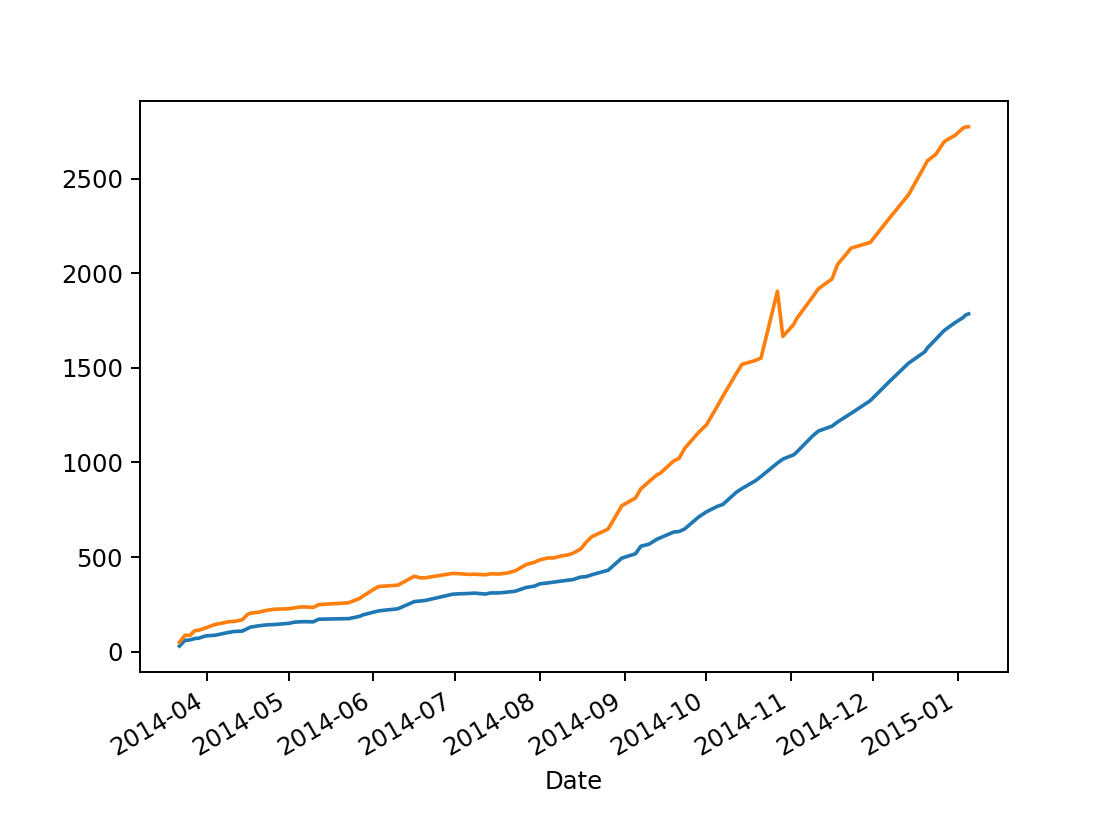

In [83]:
fig3, ax3 = plt.subplots()


In [87]:
ebola = pd.read_csv('book_resources/data/country_timeseries.csv', parse_dates=[0])
diag_df(ebola)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

None

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
ebola.index = ebola['Date']
diag_df(ebola)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2015-01-05 to 2014-03-22
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria  

None

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2015-01-05,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-27,2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
2014-03-26,2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-25,2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


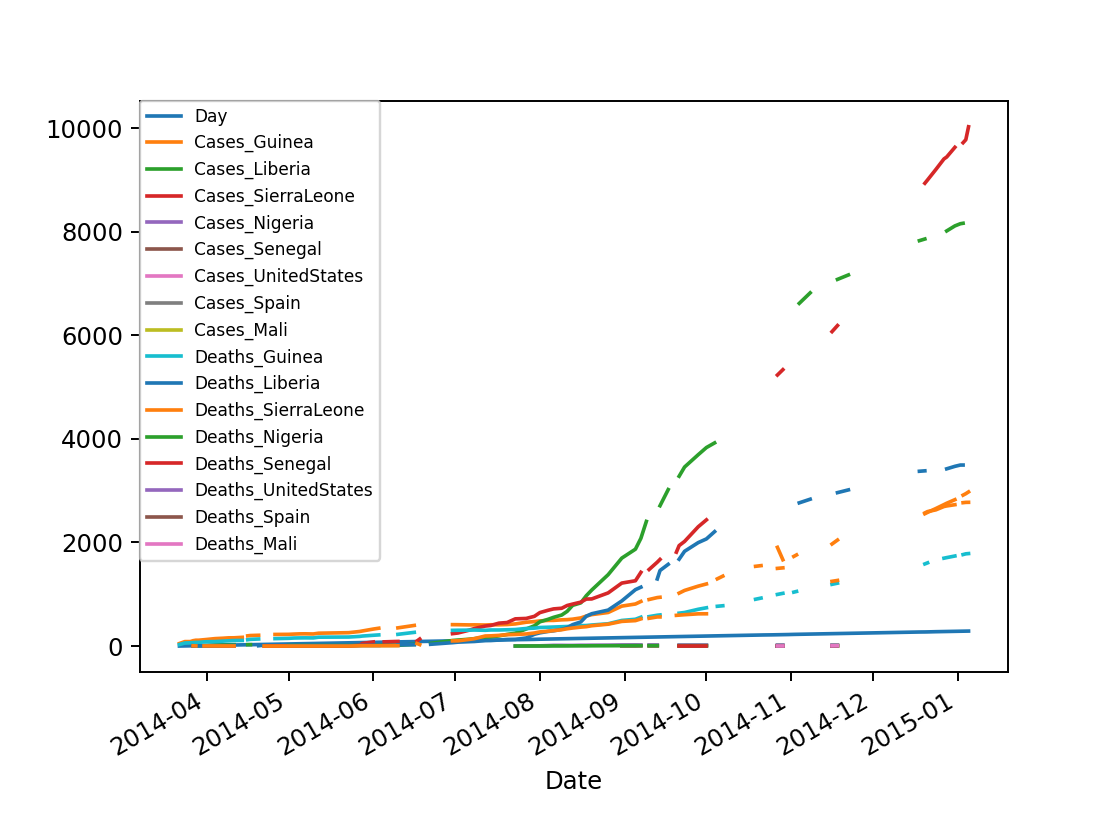

In [95]:
fig0, ax0 = plt.subplots()
ebola2 = ebola.drop(['Date'], axis=1)
ebola2.plot(ax=ax0)
ax0.legend(fontsize=7, loc=2, borderaxespad=0.)

In [96]:
ebola = pd.read_csv('book_resources/data/country_timeseries.csv', index_col='Date', parse_dates=['Date'])
diag_df(ebola)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2015-01-05 to 2014-03-22
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Day                  122 non-null    int64  
 1   Cases_Guinea         93 non-null     float64
 2   Cases_Liberia        83 non-null     float64
 3   Cases_SierraLeone    87 non-null     float64
 4   Cases_Nigeria        38 non-null     float64
 5   Cases_Senegal        25 non-null     float64
 6   Cases_UnitedStates   18 non-null     float64
 7   Cases_Spain          16 non-null     float64
 8   Cases_Mali           12 non-null     float64
 9   Deaths_Guinea        92 non-null     float64
 10  Deaths_Liberia       81 non-null     float64
 11  Deaths_SierraLeone   87 non-null     float64
 12  Deaths_Nigeria       38 non-null     float64
 13  Deaths_Senegal       22 non-null     float64
 14  Deaths_UnitedStates  18 non-null     float64
 15  Deaths_Spain         

None

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
new_index = pd.date_range(start=ebola.index.min(), end=ebola.index.max())
new_index = reversed(new_index)
ebola = ebola.reindex(new_index)
diag_df(ebola)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 2015-01-05 to 2014-03-22
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Day                  122 non-null    float64
 1   Cases_Guinea         93 non-null     float64
 2   Cases_Liberia        83 non-null     float64
 3   Cases_SierraLeone    87 non-null     float64
 4   Cases_Nigeria        38 non-null     float64
 5   Cases_Senegal        25 non-null     float64
 6   Cases_UnitedStates   18 non-null     float64
 7   Cases_Spain          16 non-null     float64
 8   Cases_Mali           12 non-null     float64
 9   Deaths_Guinea        92 non-null     float64
 10  Deaths_Liberia       81 non-null     float64
 11  Deaths_SierraLeone   87 non-null     float64
 12  Deaths_Nigeria       38 non-null     float64
 13  Deaths_Senegal       22 non-null     float64
 14  Deaths_UnitedStates  18 non-null     float64
 15  Deaths_Spain         

None

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2015-01-05,289.0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,288.0,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,287.0,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,286.0,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-26,4.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-25,3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,2.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
last_valid = ebola.apply(pd.Series.last_valid_index)
diag(last_valid)

----- Type: <class 'pandas.core.series.Series'>  Len: 17  -----
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [101]:
earliest_date = ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [102]:
shift_values  = last_valid - earliest_date
diag(shift_values)

----- Type: <class 'pandas.core.series.Series'>  Len: 17  -----
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [104]:
ebola_dict = {}
for i, col in enumerate(ebola):
    d = shift_values[i].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted
ebola_shift = pd.DataFrame(ebola_dict)
diag_df(ebola_shift)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 2015-01-05 to 2014-03-22
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Day                  122 non-null    float64
 1   Cases_Guinea         93 non-null     float64
 2   Cases_Liberia        83 non-null     float64
 3   Cases_SierraLeone    87 non-null     float64
 4   Cases_Nigeria        38 non-null     float64
 5   Cases_Senegal        25 non-null     float64
 6   Cases_UnitedStates   18 non-null     float64
 7   Cases_Spain          16 non-null     float64
 8   Cases_Mali           12 non-null     float64
 9   Deaths_Guinea        92 non-null     float64
 10  Deaths_Liberia       81 non-null     float64
 11  Deaths_SierraLeone   87 non-null     float64
 12  Deaths_Nigeria       38 non-null     float64
 13  Deaths_Senegal       22 non-null     float64
 14  Deaths_UnitedStates  18 non-null     float64
 15  Deaths_Spain         

None

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2015-01-05,289.0,2776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,288.0,2775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,287.0,2769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,286.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-26,4.0,86.0,8.0,2.0,1.0,NaN,1.0,1.0,NaN,62.0,4.0,2.0,1.0,NaN,0.0,1.0,NaN
2014-03-25,3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,2.0,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
ebola_shift.index = ebola_shift['Day']
ebola_shift.drop('Day', axis=1)
diag_df(ebola_shift)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 290 entries, 289.0 to 0.0
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Day                  122 non-null    float64
 1   Cases_Guinea         93 non-null     float64
 2   Cases_Liberia        83 non-null     float64
 3   Cases_SierraLeone    87 non-null     float64
 4   Cases_Nigeria        38 non-null     float64
 5   Cases_Senegal        25 non-null     float64
 6   Cases_UnitedStates   18 non-null     float64
 7   Cases_Spain          16 non-null     float64
 8   Cases_Mali           12 non-null     float64
 9   Deaths_Guinea        92 non-null     float64
 10  Deaths_Liberia       81 non-null     float64
 11  Deaths_SierraLeone   87 non-null     float64
 12  Deaths_Nigeria       38 non-null     float64
 13  Deaths_Senegal       22 non-null     float64
 14  Deaths_UnitedStates  18 non-null     float64
 15  Deaths_Spain         16 non-null  

None

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Day,,,,,,,,,,,,,,,,,
289.0,289.0,2776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288.0,288.0,2775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287.0,287.0,2769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286.0,286.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.0,4.0,86.0,8.0,2.0,1.0,NaN,1.0,1.0,NaN,62.0,4.0,2.0,1.0,NaN,0.0,1.0,NaN
3.0,3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,2.0,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
down = ebola.resample('M').mean()
diag_df(down)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2014-03-31 to 2015-01-31
Freq: M
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Day                  11 non-null     float64
 1   Cases_Guinea         11 non-null     float64
 2   Cases_Liberia        11 non-null     float64
 3   Cases_SierraLeone    11 non-null     float64
 4   Cases_Nigeria        6 non-null      float64
 5   Cases_Senegal        5 non-null      float64
 6   Cases_UnitedStates   3 non-null      float64
 7   Cases_Spain          3 non-null      float64
 8   Cases_Mali           3 non-null      float64
 9   Deaths_Guinea        11 non-null     float64
 10  Deaths_Liberia       11 non-null     float64
 11  Deaths_SierraLeone   11 non-null     float64
 12  Deaths_Nigeria       6 non-null      float64
 13  Deaths_Senegal       4 non-null      float64
 14  Deaths_UnitedStates  3 non-null      float64
 15  Deaths_Spain  

None

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2014-03-31,4.500000,94.500000,6.500000,3.333333,NaN,NaN,NaN,NaN,NaN,62.000000,3.750000,3.000000,NaN,NaN,NaN,NaN,NaN
2014-04-30,24.333333,177.818182,24.555556,2.200000,NaN,NaN,NaN,NaN,NaN,113.636364,9.625000,1.111111,NaN,NaN,NaN,NaN,NaN
2014-05-31,51.888889,248.777778,12.555556,7.333333,NaN,NaN,NaN,NaN,NaN,166.666667,11.111111,1.222222,NaN,NaN,NaN,NaN,NaN
2014-06-30,84.636364,373.428571,35.500000,125.571429,NaN,NaN,NaN,NaN,NaN,250.428571,28.000000,29.375000,NaN,NaN,NaN,NaN,NaN
2014-07-31,115.700000,423.000000,212.300000,420.500000,1.333333,NaN,NaN,NaN,NaN,316.300000,121.300000,189.500000,0.666667,NaN,NaN,NaN,NaN
2014-08-31,145.090909,559.818182,868.818182,844.000000,13.363636,1.000000,NaN,NaN,NaN,394.363636,468.454545,353.000000,3.545455,NaN,NaN,NaN,NaN
2014-09-30,177.500000,967.888889,2815.625000,1726.000000,20.714286,1.285714,NaN,NaN,NaN,607.000000,1508.000000,565.777778,8.000000,0.0,NaN,NaN,NaN
2014-10-31,207.470588,1500.444444,4758.750000,3668.111111,20.000000,1.000000,2.555556,1.0,1.0,870.555556,2419.000000,1151.666667,8.000000,0.0,0.666667,0.428571,1.000
2014-11-30,237.214286,1950.500000,7039.000000,5843.625000,20.000000,1.000000,4.000000,1.0,4.0,1174.500000,2928.857143,1256.750000,8.000000,0.0,1.000000,0.000000,3.625


In [108]:
up = down.resample('D').mean()
diag_df(up)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 307 entries, 2014-03-31 to 2015-01-31
Freq: D
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Day                  11 non-null     float64
 1   Cases_Guinea         11 non-null     float64
 2   Cases_Liberia        11 non-null     float64
 3   Cases_SierraLeone    11 non-null     float64
 4   Cases_Nigeria        6 non-null      float64
 5   Cases_Senegal        5 non-null      float64
 6   Cases_UnitedStates   3 non-null      float64
 7   Cases_Spain          3 non-null      float64
 8   Cases_Mali           3 non-null      float64
 9   Deaths_Guinea        11 non-null     float64
 10  Deaths_Liberia       11 non-null     float64
 11  Deaths_SierraLeone   11 non-null     float64
 12  Deaths_Nigeria       6 non-null      float64
 13  Deaths_Senegal       4 non-null      float64
 14  Deaths_UnitedStates  3 non-null      float64
 15  Deaths_Spain 

None

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2014-03-31,4.5,94.500000,6.5,3.333333,NaN,NaN,NaN,NaN,NaN,62.0,3.75,3.0,NaN,NaN,NaN,NaN,NaN
2014-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
import pytz
print(len(pytz.all_timezones))
all_zones = pytz.common_timezones
us_zones = [i for i in all_zones if i.startswith('US/') == True]
print(us_zones)

593
['US/Alaska', 'US/Arizona', 'US/Central', 'US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific']


In [124]:
ca_now = pd.Timestamp.now()
ca_now.tz_localize('US/Pacific')
print(type(ca_now), ca_now)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2020-11-24 12:06:06.038252


In [126]:
print(ca_now.timetz())

12:06:06.038252


TypeError: Cannot convert tz-naive Timestamp, use tz_localize to localize

In [127]:
depart = pd.Timestamp('2017-08-29 07:00', tz='US/Eastern')

In [128]:
depart

Timestamp('2017-08-29 07:00:00-0400', tz='US/Eastern')

In [133]:
for zone in us_zones:
    print(f'Time Zone: {zone} is \t {depart.tz_convert(zone)}')

Time Zone: US/Alaska is 	 2017-08-29 03:00:00-08:00
Time Zone: US/Arizona is 	 2017-08-29 04:00:00-07:00
Time Zone: US/Central is 	 2017-08-29 06:00:00-05:00
Time Zone: US/Eastern is 	 2017-08-29 07:00:00-04:00
Time Zone: US/Hawaii is 	 2017-08-29 01:00:00-10:00
Time Zone: US/Mountain is 	 2017-08-29 05:00:00-06:00
Time Zone: US/Pacific is 	 2017-08-29 04:00:00-07:00
